In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), activation="relu", input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(64, kernel_size=(5, 5), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [7]:
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results=model.fit(x_train,y_train, epochs=20,validation_data=(x_test, y_test),batch_size=128,
                  steps_per_epoch=391,validation_steps=79, callbacks=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
                  )



Epoch 1/20
391/391 [==============================] - 13s 8ms/step - loss: 1.5091 - accuracy: 0.4562 - val_loss: 1.2781 - val_accuracy: 0.5384
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.1668 - accuracy: 0.5867 - val_loss: 1.1223 - val_accuracy: 0.6128
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9915 - accuracy: 0.6532 - val_loss: 0.9730 - val_accuracy: 0.6608
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.8714 - accuracy: 0.6969 - val_loss: 0.9121 - val_accuracy: 0.6874
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 0.7709 - accuracy: 0.7325 - val_loss: 0.9000 - val_accuracy: 0.6923
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6853 - accuracy: 0.7601 - val_loss: 0.8544 - val_accuracy: 0.7134
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.5959 - accuracy: 0.7938 - val_loss: 0.9241 - val_accuracy: 0.6981
Epoch

In [8]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.8544 - accuracy: 0.7134


In [9]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [10]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)
y_pred1.shape

(10000,)

In [11]:
from sklearn.metrics import accuracy_score,  confusion_matrix
accuracy_score(y_test,y_pred1)*100

71.34

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
print(confusion_matrix(y_test,y_pred1))

[[804  16  29  11  19   6   6   4  61  44]
 [ 21 802   4  11   4   6  10   4  26 112]
 [ 84   8 589  46  80  76  65  30  11  11]
 [ 39  14  72 433  95 214  58  27  16  32]
 [ 21  10  86  36 683  43  57  47  11   6]
 [ 21   2  44 112  60 672  24  42   5  18]
 [  9   4  47  40  28  39 811   5   7  10]
 [ 21   1  35  23  78  76  11 717   6  32]
 [ 81  31   8  15   9   6   7   2 804  37]
 [ 42  61   6  14   6  11   5   7  29 819]]


4

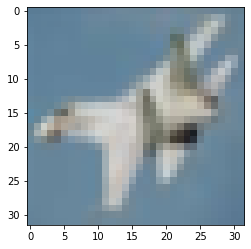

In [16]:
plt.imshow(x_test[10],cmap="gray")
y_pred1[10]

313/313 [==============================] - 2s 5ms/step - loss: 0.8544 - accuracy: 0.7134


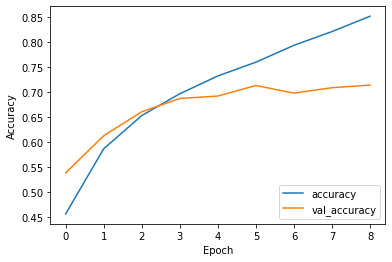

In [17]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)